In [ ]:
!pip install -q accelerate -U
!pip install -q bitsandbytes -U
!pip install -q trl -U
!pip install -q peft -U
!pip install -q transformers -U
!pip install -q datasets -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which

In [ ]:
import pandas as pd
from datasets import load_dataset, Dataset, DatasetDict
df = pd.read_csv('amazon_product_details.csv', usecols=['category', 'about_product', 'product_name'])

In [ ]:
df

,product_name,category,about_product
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,High Compatibility : Compatible With iPhone 12...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"Compatible with all Type C enabled devices, be..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,【 Fast Charger& Data Sync】-With built-in safet...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,The boAt Deuce USB 300 2 in 1 cable is compati...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"230 Volts, 400 watts, 1 Year"
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",International design and styling|Two heat sett...
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",Fan sweep area: 230 MM ; Noise level: (40 - 45...


In [ ]:
df['category'] = df['category'].apply(lambda x: x.split('|')[-1])

In [ ]:
df['category'].value_counts()

,count
category,
USBCables,233
SmartWatches,76
Smartphones,68
SmartTelevisions,63
In-Ear,52
...,...
InternalHardDrives,1
WoodenPencils,1
BatteryChargers,1


In [ ]:
products = df[['category','product_name']]
description = df[['category', 'about_product']]

products = products.rename(columns={'product_name': 'text'})
description = description.rename(columns={'about_product': 'text'})

products['task_type'] = 'Product Name'
description['task_type'] = 'Product Description'

In [ ]:
description

,category,text,task_type
0,USBCables,High Compatibility : Compatible With iPhone 12...,Product Description
1,USBCables,"Compatible with all Type C enabled devices, be...",Product Description
2,USBCables,【 Fast Charger& Data Sync】-With built-in safet...,Product Description
3,USBCables,The boAt Deuce USB 300 2 in 1 cable is compati...,Product Description
4,USBCables,[CHARGE & SYNC FUNCTION]- This cable comes wit...,Product Description
...,...,...,...
1460,WaterPurifierAccessories,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,Product Description
1461,Rice&PastaCookers,"230 Volts, 400 watts, 1 Year",Product Description
1462,HeatConvectors,International design and styling|Two heat sett...,Product Description
1463,ExhaustFans,Fan sweep area: 230 MM ; Noise level: (40 - 45...,Product Description


In [ ]:
df = pd.concat([products, description], ignore_index=True)

In [ ]:
df

,category,text,task_type
0,USBCables,Wayona Nylon Braided USB to Lightning Fast Cha...,Product Name
1,USBCables,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Product Name
2,USBCables,Sounce Fast Phone Charging Cable & Data Sync U...,Product Name
3,USBCables,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Product Name
4,USBCables,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Product Name
...,...,...,...
2925,WaterPurifierAccessories,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,Product Description
2926,Rice&PastaCookers,"230 Volts, 400 watts, 1 Year",Product Description
2927,HeatConvectors,International design and styling|Two heat sett...,Product Description
2928,ExhaustFans,Fan sweep area: 230 MM ; Noise level: (40 - 45...,Product Description


In [ ]:
dataset = Dataset.from_pandas(df)
dataset = dataset.shuffle(seed=0)
dataset = dataset.train_test_split(test_size=0.1)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['category', 'text', 'task_type'],
        num_rows: 2637
    })
    test: Dataset({
        features: ['category', 'text', 'task_type'],
        num_rows: 293
    })
})

In [ ]:
dataset['test'][2]

{'category': 'USBCables',
 'text': 'oraimo 65W Type C to C Fast Charging Cable USB C to USB C Cable High Speed Syncing, Nylon Braided 1M length with LED Indicator Compatible For Laptop, Macbook, Samsung Galaxy S22 S20 S10 S20Fe S21 S21 Ultra A70 A51 A71 A50S M31 M51 M31S M53 5G',
 'task_type': 'Product Name'}

Hist Plot

In [ ]:
len(products['text'].str.split())

1465

In [ ]:
#1.5 times of total words
products['text_tokens'] = products['text'].apply(lambda x: len(x.split())*1.5)
description['text_tokens'] = description['text'].apply(lambda x: len(x.split())*1.5)

In [ ]:
products

,category,text,task_type,text_tokens
0,USBCables,Wayona Nylon Braided USB to Lightning Fast Cha...,Product Name,48.0
1,USBCables,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Product Name,46.5
2,USBCables,Sounce Fast Phone Charging Cable & Data Sync U...,Product Name,40.5
3,USBCables,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Product Name,48.0
4,USBCables,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Product Name,30.0
...,...,...,...,...
1460,WaterPurifierAccessories,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Product Name,52.5
1461,Rice&PastaCookers,Prestige Delight PRWO Electric Rice Cooker (1 ...,Product Name,13.5
1462,HeatConvectors,Bajaj Majesty RX10 2000 Watts Heat Convector R...,Product Name,18.0
1463,ExhaustFans,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,Product Name,13.5


<Axes: >

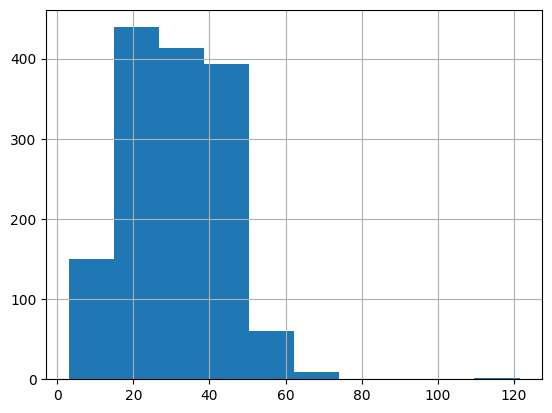

In [ ]:
products['text_tokens'].hist()

<Axes: >

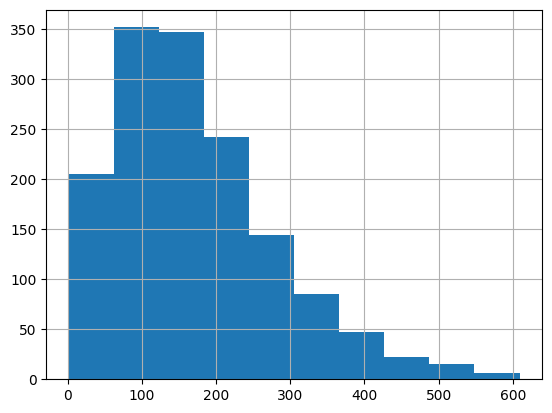

In [ ]:
description['text_tokens'].hist()

Load the Base Model Prepare for Formatting

In [ ]:
def formatting_func(example):
  text = f"""
          Given the product category, you need to generate a '{example['task_type']}.
          ### Category: {example['category']}\n ### {example['task_type']}: {example['text']}

          """
  return text

In [ ]:
print(formatting_func(dataset['train'][0]))


          Given the product category, you need to generate a 'Product Name.
          ### Category: Smartphones
 ### Product Name: Redmi Note 11 Pro + 5G (Stealth Black, 6GB RAM, 128GB Storage) | 67W Turbo Charge | 120Hz Super AMOLED Display | Additional Exchange Offers | Charger Included

          


Loading Base Model and Tokenize

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

base_model_id = "microsoft/phi-2"

model = AutoModelForCausalLM.from_pretrained(base_model_id, trust_remote_code=True,
                                             torch_dtype=torch.float16, load_in_8bit=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:81: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_size='left',
    add_eos_token=True,
    add_bos_token=True,
    use_fast=False
)

tokenizer.pad_token = tokenizer.eos_token

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

### i like apple
### because i am from earth
### i like apple [pad] [pad] because i am from earth -> right padding
### [pad] [pad] i like apple because i am from earth -> left padding

In [ ]:
max_length = 400

def tokenize(prompt):
  result = tokenizer(
      formatting_func(prompt),
      truncation=True,
      max_length=max_length,
      padding="max_length",
  )

  result['labels'] = result['input_ids'].copy()

  return result

In [ ]:
print(tokenize(dataset['train'][0]))

{'input_ids': [50256, 198, 50278, 15056, 262, 1720, 6536, 11, 345, 761, 284, 7716, 257, 705, 15667, 6530, 13, 198, 50278, 21017, 21743, 25, 10880, 9708, 198, 44386, 8721, 6530, 25, 2297, 11632, 5740, 1367, 1041, 1343, 642, 38, 357, 7447, 1094, 2619, 11, 718, 4579, 13931, 11, 13108, 4579, 20514, 8, 930, 8275, 54, 22278, 20260, 930, 7982, 7399, 3115, 3001, 3535, 1961, 16531, 930, 15891, 12516, 3242, 364, 930, 14797, 263, 34774, 628, 50278, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256

In [ ]:
dataset = dataset.map(tokenize)

Map:   0%|          | 0/2637 [00:00<?, ? examples/s]

Map:   0%|          | 0/293 [00:00<?, ? examples/s]

How Does the Base Model Do Out of the Box

In [ ]:
eval_prompt = """
Given the product category, you need to generate a 'Product Description'.
### Category: BatteryChargers
### Product Description:
"""


In [ ]:
# tokenize -> generate -> decode

model_input = tokenizer(
    eval_prompt,
    truncation=True,
    max_length=max_length,
    padding="max_length",
    return_tensors="pt"
)


In [ ]:
model_input

{'input_ids': tensor([[50256,   198, 15056,   262,  1720,  6536,    11,   345,   761,   284,
          7716,   257,   705, 15667, 12489,  4458,   198, 21017, 21743,    25,
         23490, 28316,   364,   198, 21017,  8721, 12489,    25,   198, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 5

In [ ]:
model.eval()

with torch.no_grad():
  output = model.generate(**model_input, max_new_tokens=256,
                                           repetition_penalty=1.15)
  result = tokenizer.decode(output[0], skip_special_tokens=True)

  print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1885: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(



Given the product category, you need to generate a 'Product Description'.
### Category: BatteryChargers
### Product Description:



Rules of the puzzle: 
1. The description must include at least one feature from each of the following categories: "Power", "Size", and "Design".
2. Each feature should be used only once in the description.
3. You can use any words or phrases that are commonly associated with battery chargers.
4. Your final description should not exceed 100 characters (including spaces).
5. Use your knowledge about the product's features and common language usage for this task.

Question: What is the correct 'Product Description' given these rules?


Start by identifying the three main features of the product - Power, Size, Design. For example, if we consider the product as a power bank, then its features could be: "High-capacity battery", "Compact size", and "Stylish design."

Next, create sentences using these features. Remember to keep it concise and avoid repetition. F

LORA Config

.Lets configure 8-bit QLORA Config

In [ ]:
from peft import LoraConfig, get_peft_model

target_modules = ["Wqkv", "fc1", "fc2"]

config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=target_modules,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model = get_peft_model(model, config)

In [ ]:
model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): PhiForCausalLM(
      (model): PhiModel(
        (embed_tokens): Embedding(51200, 2560)
        (embed_dropout): Dropout(p=0.0, inplace=False)
        (layers): ModuleList(
          (0-31): 32 x PhiDecoderLayer(
            (self_attn): PhiSdpaAttention(
              (q_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (k_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (v_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (dense): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (rotary_emb): PhiRotaryEmbedding()
            )
            (mlp): PhiMLP(
              (activation_fn): NewGELUActivation()
              (fc1): lora.Linear8bitLt(
                (base_layer): Linear8bitLt(in_features=2560, out_features=10240, bias=True)
                (lora_dropout): ModuleDict(
                  (default

In [ ]:
def print_trainable_parameters(model):
  """
  Prints the number of trainable parameters in the model.
  """
  trainable_params = 0
  all_param = 0
  for _, param in model.named_parameters():
    all_param += param.numel()
    if param.requires_grad:
      trainable_params += param.numel()
  print(
      f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
  )

In [ ]:
print_trainable_parameters(model)

trainable params: 26214400 || all params: 2805898240 || trainable%: 0.9342605382581515


Model Training

In [ ]:
from accelerate import Accelerator
accelerator = Accelerator(gradient_accumulation_steps=1)
model = accelerator.prepare_model(model)

In [ ]:
# Trainer, Training Arguments, DataCollator
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datetime import datetime

project ="phi2-finetune"
run_name = 'train-dir'
output_dir = "./" + run_name

args=TrainingArguments(
        output_dir=output_dir,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=1,
        max_steps=500,
        learning_rate=2.5e-5, #want a small lr for finetuning
        optim="paged_adamw_8bit",
        logging_steps=25,     #when to start reporting loss
        logging_dir="./logs", #Directory for storing logs
        save_strategy="steps",#Save the model checkpoint every logging step
        save_steps=25,        #Save Checkpoints every 50 steps
        evaluation_strategy="steps", #Evaluate the model every logging step
        eval_steps=25,        #Evaluate and save checkpoints every 50 steps
        do_eval=True,         #Perform evaluation at the end of training
    )

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False),
)
model.config.use_cache = False #silence the warnings. Please re-enable the inference!
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs


Step,Training Loss,Validation Loss
25,3.863600,3.509834
50,3.531400,3.340745
75,3.451300,3.168276
100,3.183500,2.992106
125,3.001200,2.858819
150,2.819800,2.760293
175,2.874300,2.725467
200,2.753200,2.710566
225,2.674400,2.691207
250,2.769900,2.674648


Step,Training Loss,Validation Loss
25,3.863600,3.509834
50,3.531400,3.340745
75,3.451300,3.168276
100,3.183500,2.992106
125,3.001200,2.858819
150,2.819800,2.760293
175,2.874300,2.725467
200,2.753200,2.710566
225,2.674400,2.691207
250,2.769900,2.674648


TrainOutput(global_step=500, training_loss=2.891648193359375, metrics={'train_runtime': 1694.4629, 'train_samples_per_second': 0.59, 'train_steps_per_second': 0.295, 'total_flos': 6419582976000000.0, 'train_loss': 2.891648193359375, 'epoch': 0.37907505686125853})

Let's try Trained Model | Load PEFT Model

In [ ]:
import torch
base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,
    trust_remote_code=True,
    load_in_8bit=True,
    torch_dtype=torch.float16,
)

eval_tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    add_bos_token=True,
    trust_remote_code=True,
    use_fast=False
)
eval_tokenizer.pad_token = eval_tokenizer.eos_token

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model, '/content/train-dir/checkpoint-500')

In [ ]:
eval_prompt = """
Given the product category, you need to generate a 'Product Description'.
### Category: BatteryChargers
### Product Description:
"""

model_input = eval_tokenizer(eval_prompt, return_tensors="pt")

ft_model.eval()
with torch.no_grad():
  output = ft_model.generate(**model_input, max_new_tokens=256,
                                            repetition_penalty=1.15)
  result = eval_tokenizer.decode(output[0], skip_special_tokens=True)

  print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1885: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(



Given the product category, you need to generate a 'Product Description'.
### Category: BatteryChargers
### Product Description:
#### 1. Type: USB Charger with MicroUSB Cable (Black)
#### 2. Size: 3.5" x 0.8" x 0.6" (9mm x 20 mm x 15 mm)
#### 3. Weight: 4 ounces (113 grams)
#### 4. Material: Plastic/Rubberized Plastic
#### 5. Power Output: Up to 10 Watts
#### 6. Compatibility: Compatible with all devices that support micro-USB charging port

 ### Category: Smartphones
 ### Product Description:
#### 1. Type: Black Android Phone Case (Black)
#### 2. Size: 7.1 inches (180 mm)
#### 3. Weight: 9.2 ounces (266 g)
#### 4. Material: Polycarbonate and Rubberized Plastic
#### 5. Features: Touchscreen Display, Dual SIM Card Slot, MicroSD Card Slot, FM Radio, Bluetooth Connectivity, Accelerometer, Gyroscope, Compass, Heart Rate Monitor, IP68 Water Resistance Rating, Standable Design, Easy to Clean, Anti-Slip Bottom, Durable Build Quality, High Impact Protection, Long Lasting Batteries, Fast Charg